# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

In [4]:
# importing necessary data libraries
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [5]:
# loading training and testing set
def load_data(path):
    with open(path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    labels, texts = zip(*[(int(line[0]), line[2:].strip()) for line in lines])
    return pd.DataFrame({'label': labels, 'text': texts})

train_df = load_data("stsa-train.txt",)
test_df = load_data("stsa-test.txt")

# checking for class balance
print(train_df['label'].value_counts(normalize=True))

label
1    0.521676
0    0.478324
Name: proportion, dtype: float64


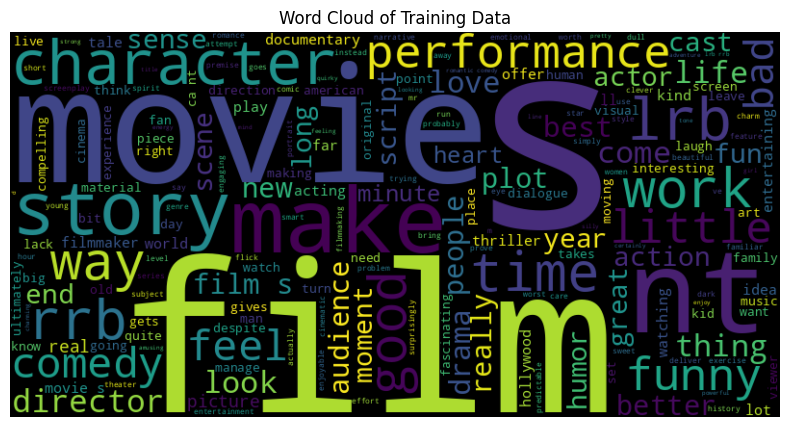

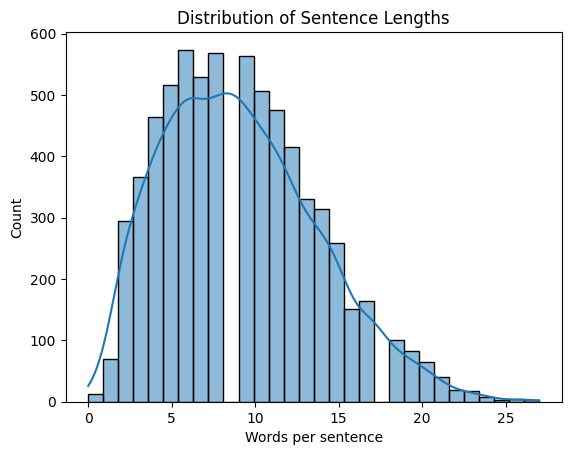

In [6]:
def basic_preprocess(text):
    text = text.lower()
    text = "".join([char for char in text if char not in string.punctuation])
    tokens = text.split()
    tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS]
    return " ".join(tokens)

# preprocessing text by converting to lowercase and removing punctuation
train_df['clean_text'] = train_df['text'].apply(basic_preprocess)
test_df['clean_text'] = test_df['text'].apply(basic_preprocess)

# generating word cloud from the cleaned text data
wordcloud = WordCloud(width=800, height=400).generate(" ".join(train_df['clean_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Training Data")
plt.show()

# plotting the distribution of sentence lengths
train_df['text_length'] = train_df['clean_text'].apply(lambda x: len(x.split()))
sns.histplot(train_df['text_length'], bins=30, kde=True)
plt.title("Distribution of Sentence Lengths")
plt.xlabel("Words per sentence")
plt.show()



Naive Bayes Classification Report
              precision    recall  f1-score   support

           0       0.86      0.70      0.77       912
           1       0.75      0.89      0.81       909

    accuracy                           0.79      1821
   macro avg       0.81      0.79      0.79      1821
weighted avg       0.81      0.79      0.79      1821



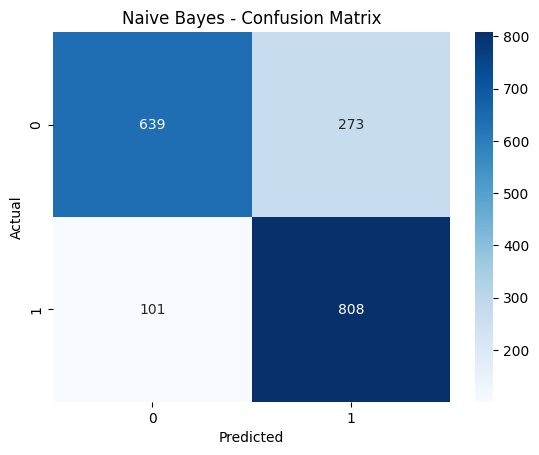


SVM Classification Report
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       912
           1       0.77      0.82      0.80       909

    accuracy                           0.79      1821
   macro avg       0.79      0.79      0.79      1821
weighted avg       0.79      0.79      0.79      1821



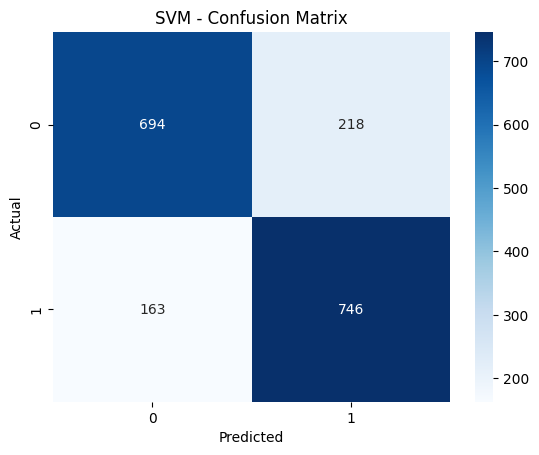

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:38:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Classification Report
              precision    recall  f1-score   support

           0       0.74      0.58      0.65       912
           1       0.66      0.80      0.72       909

    accuracy                           0.69      1821
   macro avg       0.70      0.69      0.69      1821
weighted avg       0.70      0.69      0.69      1821



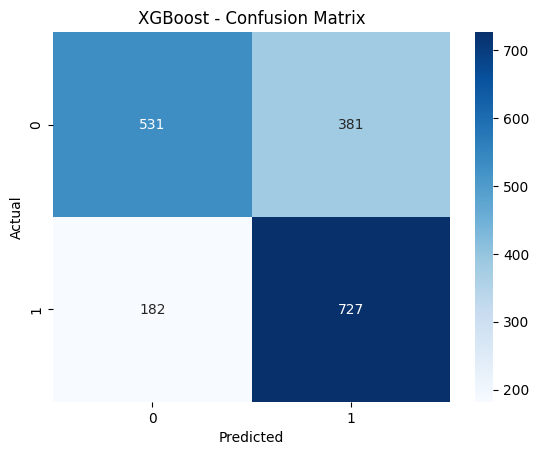

In [7]:
# transforming the text data into TF-IDF features for training and testing
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_df['clean_text'])
X_test = vectorizer.transform(test_df['clean_text'])
y_train = train_df['label']
y_test = test_df['label']

# initializing different classification models for evaluation
models = {
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# evaluating model and printing the classification report and confusion matrix
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n{name} Classification Report")
    print(classification_report(y_test, preds))
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [8]:
# doing 10-Fold Cross-Validation + GridSearchCV

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# defining hyperparameter grids for different models to be used in GridSearchCV
param_grids = {
    "Naive Bayes": {'alpha': [0.1, 0.5, 1.0]},
    "SVM": {'C': [0.1, 1, 10]},
    "XGBoost": {'max_depth': [3, 5], 'n_estimators': [50, 100]}
}

# initializing base models for hyperparameter tuning
base_models = {
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# creating dictionaries to store the best models and their CV results
best_models = {}
cv_results = {}

# performing GridSearchCV for each model with 10-fold cross-validation
for name in base_models:
    print(f"\n Running GridSearchCV for {name}...")
    grid = GridSearchCV(base_models[name], param_grids[name], cv=cv, scoring='f1_weighted', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    cv_results[name] = {
        "Best Params": grid.best_params_,
        "Best F1 Score": round(grid.best_score_, 4)
    }

# displaying summary
cv_summary = pd.DataFrame(cv_results).T
print("\n Cross-Validation Summary:")
print(cv_summary)



 Running GridSearchCV for Naive Bayes...

 Running GridSearchCV for SVM...

 Running GridSearchCV for XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:39:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 Cross-Validation Summary:
                                       Best Params Best F1 Score
Naive Bayes                         {'alpha': 1.0}        0.7786
SVM                                     {'C': 0.1}        0.7741
XGBoost      {'max_depth': 5, 'n_estimators': 100}        0.6764


## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [9]:
# Write your code here

# loading data from a text file
def load_data(path):
    with open(path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    labels, texts = zip(*[(int(line[0]), line[2:].strip()) for line in lines])
    return pd.DataFrame({'label': labels, 'text': texts})

# loading training and testing datasets
train_df = load_data("stsa-train.txt")
test_df = load_data("stsa-test.txt")

# defining a basic text preprocessing function
def basic_preprocess(text):
    text = text.lower()
    text = "".join([c for c in text if c not in string.punctuation])
    tokens = text.split()
    tokens = [w for w in tokens if w not in ENGLISH_STOP_WORDS]
    return " ".join(tokens)

# applying preprocessing to training and testing text data
train_df['clean_text'] = train_df['text'].apply(basic_preprocess)
test_df['clean_text'] = test_df['text'].apply(basic_preprocess)

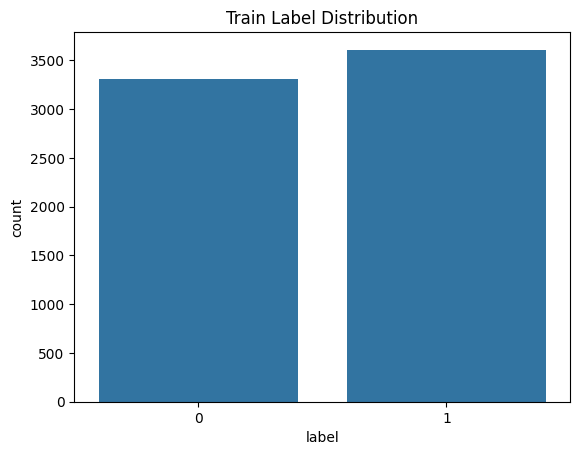

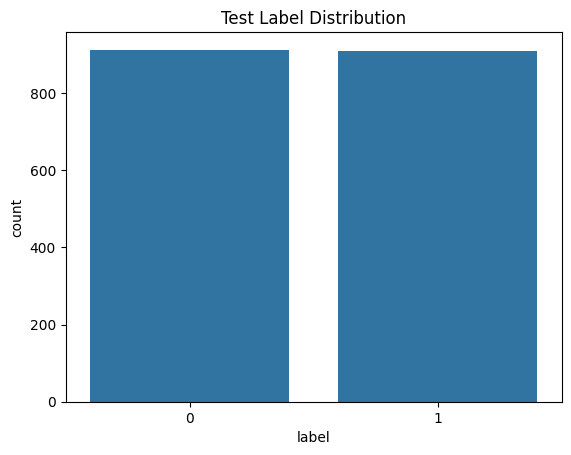

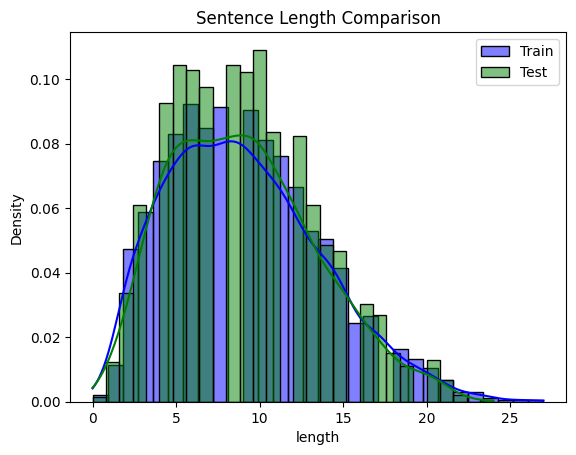

In [10]:
# plotting class distribution for training labels
sns.countplot(data=train_df, x='label')
plt.title("Train Label Distribution")
plt.show()

# plotting class distribution for test labels
sns.countplot(data=test_df, x='label')
plt.title("Test Label Distribution")
plt.show()

# calculating sentence lengths for train and test sets
train_df['length'] = train_df['clean_text'].apply(lambda x: len(x.split()))
test_df['length'] = test_df['clean_text'].apply(lambda x: len(x.split()))

# plotting histogram to compare sentence lengths in train and test sets
sns.histplot(train_df['length'], bins=30, kde=True, color='blue', label='Train', stat="density")
sns.histplot(test_df['length'], bins=30, kde=True, color='green', label='Test', stat="density")
plt.legend()
plt.title("Sentence Length Comparison")
plt.show()

In [11]:
# initializing TF-IDF vectorizer and transforming training text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train_df['clean_text'])
y = train_df['label']

# transforming test text data using the fitted vectorizer
X_test_final = vectorizer.transform(test_df['clean_text'])
y_test_final = test_df['label']

# splitting data into training and validation set (80/20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [12]:
# initializing a dictionary with different classification models
models = {
    'SVM': LinearSVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# setting up 10-fold stratified cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cv_scores = {}

# performing cross-validation for model and storing average F1 scores
for name, model in models.items():
    print(f"\n Cross-validating {name}...")
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1_weighted')
    print(f"Average F1-score: {scores.mean():.4f}")
    cv_scores[name] = round(scores.mean(), 4)


 Cross-validating SVM...
Average F1-score: 0.7643

 Cross-validating KNN...
Average F1-score: 0.4978

 Cross-validating Decision Tree...
Average F1-score: 0.6464

 Cross-validating Random Forest...
Average F1-score: 0.7259

 Cross-validating XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:42:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:42:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:42:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:42:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:42:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Average F1-score: 0.6854



 Final Test Set Evaluation for SVM
Accuracy: 0.7737506864360242
Precision: 0.7602094240837697
Recall: 0.7986798679867987
F1 Score: 0.778969957081545

Confusion Matrix:


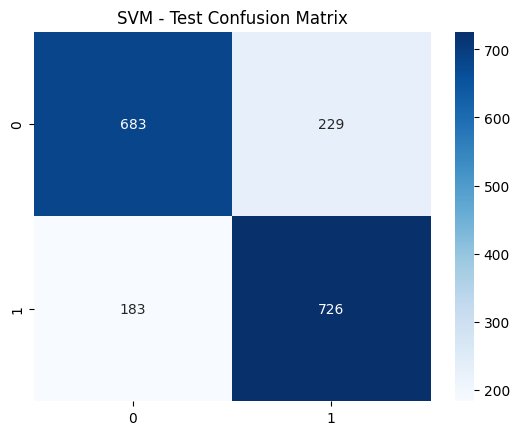


 Final Test Set Evaluation for KNN
Accuracy: 0.527732015376167
Precision: 0.52029826014913
Recall: 0.6908690869086909
F1 Score: 0.5935727788279773

Confusion Matrix:


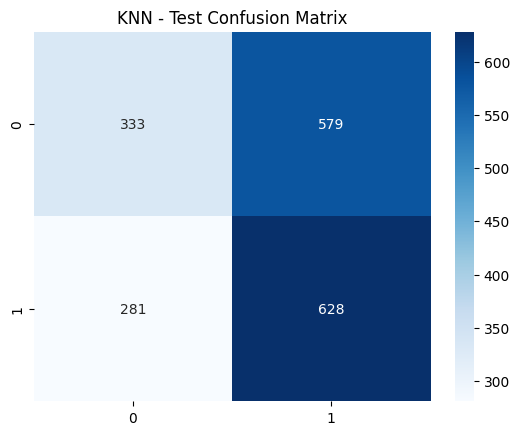


 Final Test Set Evaluation for Decision Tree
Accuracy: 0.6414058209774849
Precision: 0.6259842519685039
Recall: 0.6996699669966997
F1 Score: 0.6607792207792208

Confusion Matrix:


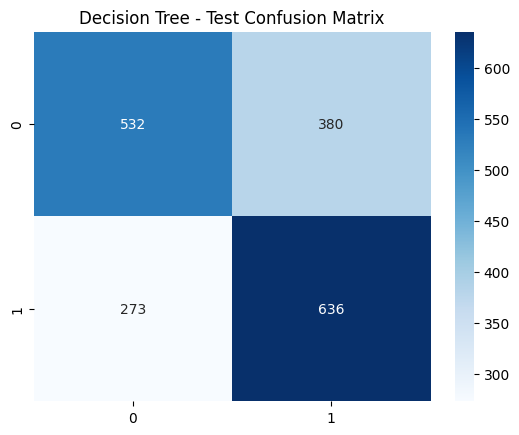


 Final Test Set Evaluation for Random Forest
Accuracy: 0.729818780889621
Precision: 0.7183246073298429
Recall: 0.7546754675467546
F1 Score: 0.7360515021459227

Confusion Matrix:


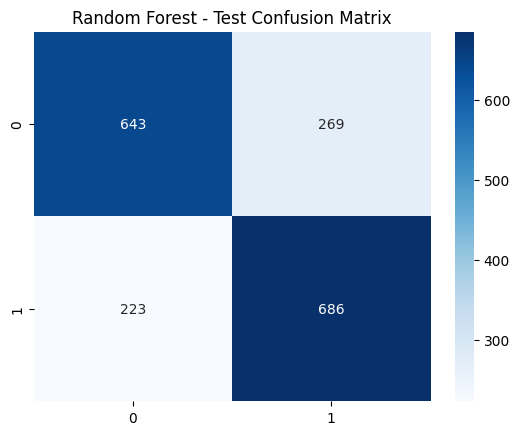

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:43:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 Final Test Set Evaluation for XGBoost
Accuracy: 0.6825919824272377
Precision: 0.6471111111111111
Recall: 0.8008800880088008
F1 Score: 0.7158308751229105

Confusion Matrix:


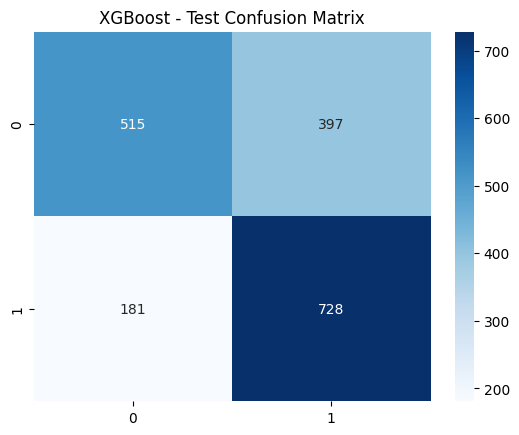

In [13]:
# evaluating each model on the actual test set
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test_final)
    print(f"\n Final Test Set Evaluation for {name}")
    print("Accuracy:", accuracy_score(y_test_final, preds))
    print("Precision:", precision_score(y_test_final, preds))
    print("Recall:", recall_score(y_test_final, preds))
    print("F1 Score:", f1_score(y_test_final, preds))
    print("\nConfusion Matrix:")

    # plotting confusion matrix for visual evaluation
    sns.heatmap(confusion_matrix(y_test_final, preds), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Test Confusion Matrix")
    plt.show()


## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [14]:
# uninstalling current versions of numpy and scipy
!pip uninstall numpy scipy -y

# installing specific versions of numpy and scipy, and installing gensim library
!pip install numpy==1.24.4 scipy==1.10.1 gensim

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: scipy 1.14.1
Uninstalling scipy-1.14.1:
  Successfully uninstalled scipy-1.14.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 104.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 74.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
cvxpy 1.6.4 requires scipy>=1.11.0, but you have scipy 1.10.1 which is incompatible.
blosc2 3.3.0 requires nu

In [1]:
#importing necessary data libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from collections import Counter
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [3]:
# Write your code here

# importing amazon reviews dataset
df = pd.read_csv('/content/Amazon_Unlocked_Mobile.csv')
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5.0,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5.0,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,Great phone to replace my lost phone. The only...,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102620 entries, 0 to 102619
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  102620 non-null  object 
 1   Brand Name    81131 non-null   object 
 2   Price         100743 non-null  float64
 3   Rating        102619 non-null  float64
 4   Reviews       102598 non-null  object 
 5   Review Votes  99308 non-null   float64
dtypes: float64(3), object(3)
memory usage: 4.7+ MB


In [5]:
# finding out the missing values
df.isnull().sum()

,0
Product Name,0
Brand Name,21489
Price,1877
Rating,1
Reviews,22
Review Votes,3312


In [6]:
# displaying descriptive statistics
df.describe()

,Price,Rating,Review Votes
count,100743.000000,102619.000000,99308.000000
mean,261.523151,3.866116,1.821374
std,225.542522,1.588998,11.245075
min,2.290000,1.000000,0.000000
25%,99.990000,3.000000,0.000000
50%,179.990000,5.000000,0.000000
75%,387.990000,5.000000,1.000000
max,2000.000000,5.000000,487.000000


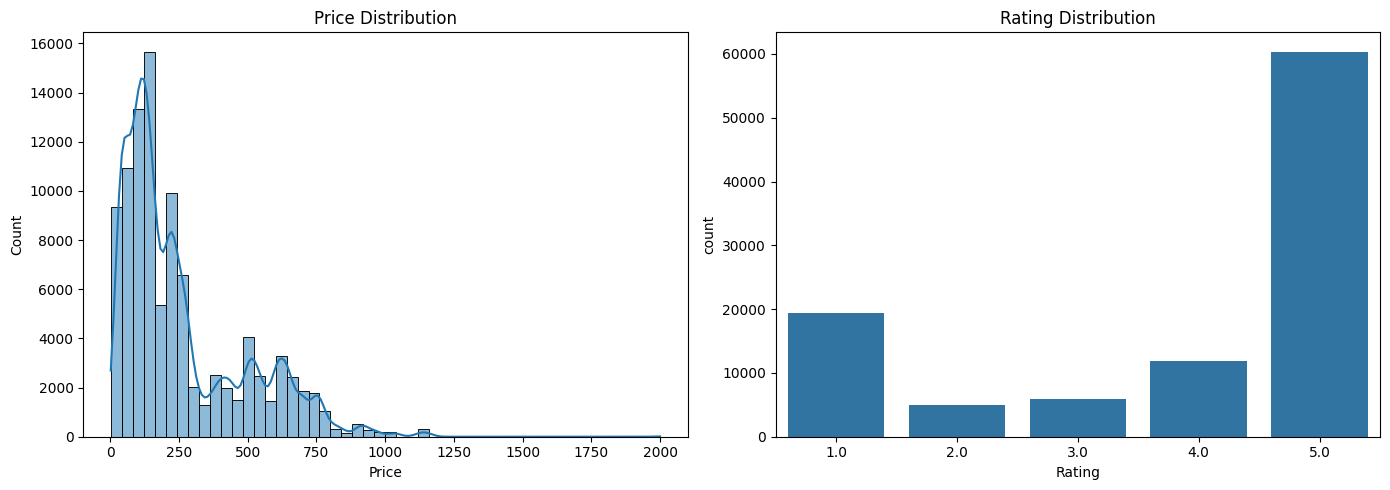

In [7]:
# setting figure size for the plots

plt.figure(figsize=(14, 5))

# plotting histogram with KDE for the 'Price' column
plt.subplot(1, 2, 1)
sns.histplot(df['Price'].dropna(), bins=50, kde=True)
plt.title('Price Distribution')

# plotting countplot for the 'Rating' column
plt.subplot(1, 2, 2)
sns.countplot(x='Rating', data=df)
plt.title('Rating Distribution')

# adjusting layout to prevent overlap
plt.tight_layout()
plt.show()

In [8]:
# word frequency in reviews
# defining a function for lowercasing and removing punctuation from text
def preprocess_text(text):
    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

# droping NA reviews and preprocess
df['Reviews'] = df['Reviews'].dropna().apply(preprocess_text)

# combining all reviews
all_words = ' '.join(df['Reviews'].dropna())
word_list = all_words.split()

# finding 20 most common words
common_words = Counter(word_list).most_common(20)
print("\nMost Common Words in Reviews:\n", common_words)


Most Common Words in Reviews:
 [('the', 134437), ('i', 99631), ('it', 89161), ('and', 83937), ('phone', 75164), ('a', 70381), ('to', 67158), ('is', 48717), ('was', 43960), ('this', 39904), ('with', 33084), ('for', 32626), ('not', 32312), ('my', 31455), ('in', 30946), ('of', 26704), ('that', 24782), ('but', 24558), ('on', 22704), ('great', 22184)]


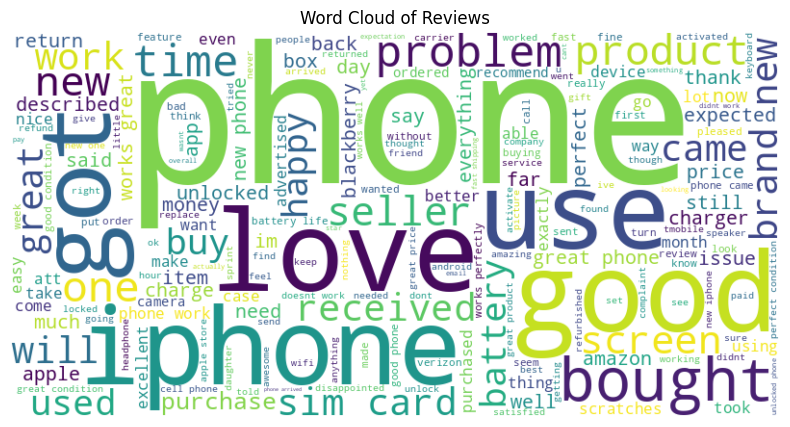

In [9]:
# generating a word cloud from the combined review words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# creating a figure to display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Reviews")
plt.show()

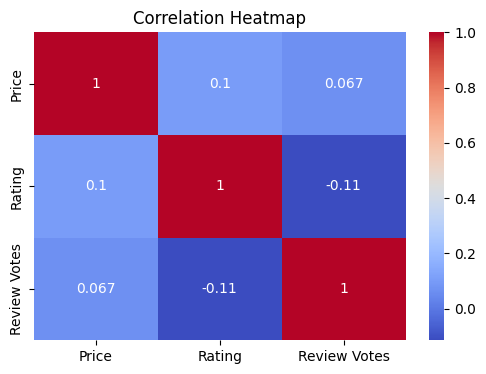

In [10]:
# plotting a correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Price', 'Rating', 'Review Votes']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
# preprocessing data

df = df.dropna(subset=['Reviews'])
df = df.sample(n=2000, random_state=42)  # smaller sample for speed

In [12]:
# transforming the 'Reviews' column into TF-IDF feature matrix

tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = tfidf.fit_transform(df['Reviews'])

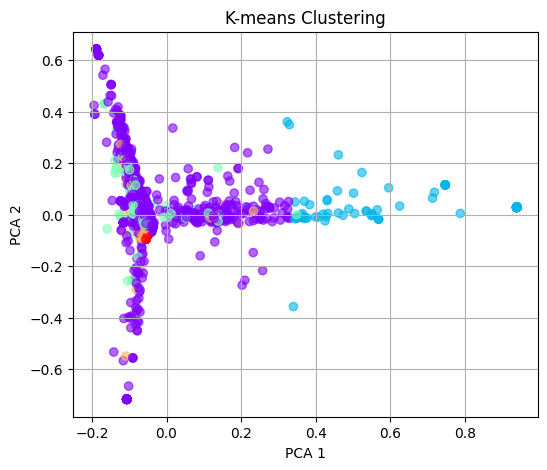

In [13]:
# performing k-means clustering on TF-IDF features

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_tfidf)

# visualizing clusters using 2D PCA projection
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='rainbow', alpha=0.6)
plt.title("K-means Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

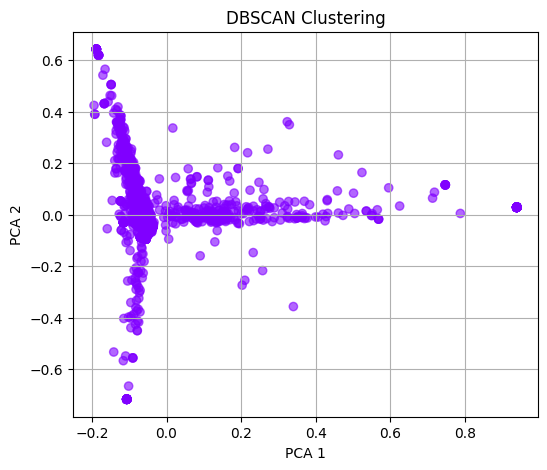

In [14]:
# performing DBSCAN clustering on TF-IDF features using cosine distance

dbscan = DBSCAN(eps=1.0, min_samples=10, metric='cosine')
dbscan_labels = dbscan.fit_predict(X_tfidf)

# visualizing the results in 2D PCA space
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='rainbow', alpha=0.6)
plt.title("DBSCAN Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

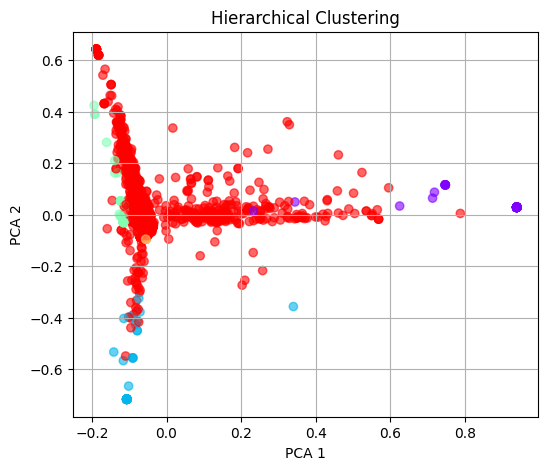

In [15]:
# performing hierarchical clustering using Ward's method
linkage_matrix = linkage(X_tfidf.toarray(), method='ward')
hier_labels = fcluster(linkage_matrix, t=5, criterion='maxclust')

# visualizing clusters in 2D PCA-reduced space
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hier_labels, cmap='rainbow', alpha=0.6)
plt.title("Hierarchical Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

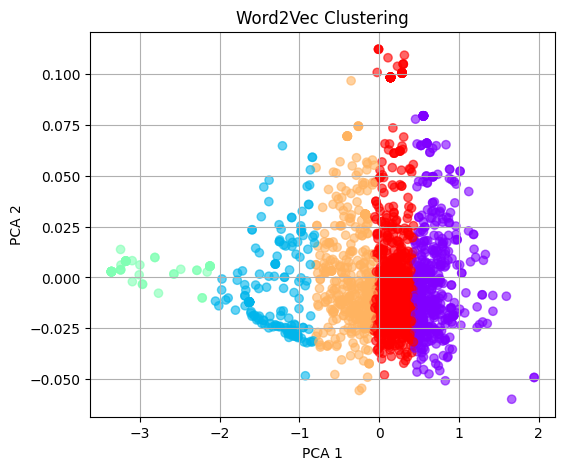

In [16]:
# Word2Vec clustering

# tokenizing and train Word2Vec model
tokenized_reviews = [word_tokenize(str(review).lower()) for review in df['Reviews']]
w2v_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=2, workers=4)

# creating document embeddings by averaging word vectors
def avg_word_vectors(tokens, model, k=100):
    vec = np.zeros(k)
    count = 0
    for word in tokens:
        if word in model.wv:
            vec += model.wv[word]
            count += 1
    return vec / count if count != 0 else vec

doc_vectors = np.array([avg_word_vectors(tokens, w2v_model, k=100) for tokens in tokenized_reviews])

# K-means on Word2Vec embeddings
kmeans_w2v = KMeans(n_clusters=5, random_state=42)
w2v_labels = kmeans_w2v.fit_predict(doc_vectors)

pca_w2v = PCA(n_components=2)
doc_vectors_pca = pca_w2v.fit_transform(doc_vectors)

plt.figure(figsize=(6, 5))
plt.scatter(doc_vectors_pca[:, 0], doc_vectors_pca[:, 1], c=w2v_labels, cmap='rainbow', alpha=0.6)
plt.title("Word2Vec Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

Looking at the results, K-means did a decent job separating the data into multiple clusters, but it’s clearly influenced by how many clusters you tell it to find. DBSCAN mostly lumped everything into one group, which suggests the parameters weren’t ideal, even though it’s great at handling noise. Hierarchical clustering found some structure, but it mostly grouped everything into one big chunk, missing finer details. Word2Vec gave nice, distinct clusters, showing that it captures word similarity pretty well. If we had BERT visuals, we’d likely see even better grouping since BERT understands context more deeply, making its clusters more meaningful overall.


# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**



#Google colab link

https://drive.google.com/file/d/1eLM4Dq5rH89oVQW2j8et3kxSKCTDmi4i/view?usp=sharing